<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: - Ames Housing Data and Kaggle Challenge


## Contents:
- [Library and data import](#Library-and-data-import)
- [Original Data Dictionary](#Original-Data-Dictionary)
- [Train.csv data cleaning](#Data-cleaning-for-training-data)
- [Null value cleaning for training dataset](#Null-value-cleaning-for-training-dataset)
- [Test.csv data cleaning](#Data-cleaning-for-test-data)
- [Null value cleaning for test dataset](#Null-value-cleaning-for-test-dataset)
- [EDA & Feature engineering](#Exploratory-Data-Analysis-&-Feature-engineering)
- [Mapping values to ordinal variables in training dataset](#Ranking-Training's-dataset-ordinal-features)
- [Dummify nominal variables in training dataset](#Dummify-nominal-variables-in-the-training-dataset)
- [Mapping values to ordinal variables in test dataset](#Ranking-Test's-dataset-ordinal-features)
- [Dummify nominal variables in test dataset](#Dummify-nominal-variables-in-the-test-dataset)
- [Exporting both final set to csv](#Exporting-both-final-set-to-csv)

## Library and data import

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
training = pd.read_csv("../datasets/train.csv",defa)


In [3]:
test = pd.read_csv("../datasets/test.csv")

### Datasets used for this notebook:

* [`train.csv`](../datasets/train.csv):  Ames Iowa Housing train dataset provided by kaggle
* [`test.csv`](../datasets/test.csv):  Ames Iowa Housing test dataset provided by kaggle

## Original Data Dictionary

The variables were split into:
##### Quantitative: Quantify things by considering numerical values and make it countable in nature 
    - Discrete: Numerical values which fall under intergers or whole number.
    
    - Continuous: Numerical values that are fractional numbers
    
##### Qualitative: Data that can't be counted or measure easily using numbers and therefore divided into categories 
    - Ordinal: Types of values that have natural ordering while maintaining their class of values.
    
    - Nominal: Set of values that don't possess a natural ordering.
    
* [4 Types of Data: Nominal, Ordinal, Discrete, Continuous](https://www.upgrad.com/blog/types-of-data/)


|Column|Variable Type|Dataset|Description|
|---|---|---|---|
|id|Nominal|train.csv & test.csv|Observation ID of the property|
|pid|Nominal|train.csv & test.csv|Parcel identification number  - can be used with city web site for parcel review.|
|ms_subclass|Nominal|train.csv & test.csv|Identifies the type of dwelling involved in the sale.|
|ms_zoning|Nominal|train.csv & test.csv|Identifies the general zoning classification of the sale.|
|lot_frontage|Continuous|train.csv & test.csv|Linear feet of street connected to property|
|lot_area|Continuous|train.csv & test.csv|Lot size in square feet|
|street|Nominal|train.csv & test.csv|Type of road access to property|
|alley|Nominal|train.csv & test.csv|Type of alley access to property|
|lot_shape|Ordinal|train.csv & test.csv|General shape of property|
|land_contour|Nominal|train.csv & test.csv|Flatness of the property|
|utilities|Ordinal|train.csv & test.csv|Type of utilities available|
|lot_config|Nominal|train.csv & test.csv|Lot configuration|
|land_slope|Ordinal|train.csv & test.csv|Slope of property|
|neighborhood|Nominal|train.csv & test.csv|Physical locations within Ames city limits|
|condition_1|Nominal|train.csv & test.csv|Proximity to various conditions|
|condition_2|Nominal|train.csv & test.csv|Proximity to various conditions (if more than one is present)|
|bldg_type|Nominal|train.csv & test.csv|Type of dwelling|
|house_style|Nominal|train.csv & test.csv|Style of dwelling|
|overall_qual|Ordinal|train.csv & test.csv|Rates the overall material and finish of the house|
|overall_cond|Ordinal|train.csv & test.csv|Rates the overall condition of the house|
|year_built|Discrete|train.csv & test.csv|Original construction date|
|year_remod/add|Discrete|train.csv & test.csv|Remodel date (same as construction date if no remodeling or additions)|
|roof_style|Nominal|train.csv & test.csv|Type of roof|
|roof_matl|Nominal|train.csv & test.csv|Roof material|
|exterior_1st|Nominal|train.csv & test.csv|Exterior covering on house|
|exterior_2nd|Nominal|train.csv & test.csv|Exterior covering on house (if more than one material)|
|mas_vnr_type|Nominal|train.csv & test.csv|Masonry veneer type|
|mas_vnr_area|Continuous|train.csv & test.csv|Masonry veneer area in square feet|
|exter_qual|Ordinal|train.csv & test.csv|Evaluates the quality of the material on the exterior|
|exter_cond|Ordinal|train.csv & test.csv|Evaluates the present condition of the material on the exterior|
|foundation|Nominal|train.csv & test.csv|Type of foundation|
|bsmt_qual|Ordinal|train.csv & test.csv|Evaluates the height of the basement|
|bsmt_cond|Ordinal|train.csv & test.csv|Evaluates the general condition of the basement|
|bsmt_exposure|Ordinal|train.csv & test.csv|Refers to walkout or garden level walls|
|bsmtfin_type_1|Ordinal|train.csv & test.csv|Rating of basement finished area|
|bsmtfin_sf_1|Continuous|train.csv & test.csv|Type 1 finished square feet|
|bsmtfin_type_2|Ordinal|train.csv & test.csv|Rating of basement finished area (if multiple types)|
|bsmtfin_sf_2|Continuous|train.csv & test.csv|Type 2 finished square feet|
|bsmt_unf_sf|Continuous|train.csv & test.csv|Unfinished square feet of basement area|
|total_bsmt_sf|Continuous|train.csv & test.csv|Total square feet of basement area|
|heating|Nominal|train.csv & test.csv|Type of heating|
|heating_qc|Ordinal|train.csv & test.csv|Heating quality and condition|
|central_air|Nominal|train.csv & test.csv|Central air conditioning|
|electrical|Nominal|train.csv & test.csv|Electrical system|
|1st_flr_sf|Continuous|train.csv & test.csv|First Floor square feet|
|2nd_flr_sf|Continuous|train.csv & test.csv|Second floor square feet|
|low_qual_fin_sf|Continuous|train.csv & test.csv|Low quality finished square feet (all floors)|
|gr_liv_area|Continuous|train.csv & test.csv|Above grade (ground) living area square feet|
|bsmt_full_bath|Discrete|train.csv & test.csv|Basement full bathrooms|
|bsmt_half_bath|Discrete|train.csv & test.csv|Basement half bathrooms|
|full_bath|Discrete|train.csv & test.csv|Full bathrooms above grade|
|half_bath|Discrete|train.csv & test.csv|Half baths above grade|
|bedroom_abvgr|Discrete|train.csv & test.csv|Bedrooms above grade (does NOT include basement bedrooms)|
|kitchen_abvgr|Discrete|train.csv & test.csv|Kitchens above grade|
|kitchen_qual|Ordinal|train.csv & test.csv|Kitchen quality|
|totrms_abvgrd|Discrete|train.csv & test.csv|Total rooms above grade (does not include bathrooms)|
|functional|Ordinal|train.csv & test.csv|Home functionality (Assume typical unless deductions are warranted)|
|fireplaces|Discrete|train.csv & test.csv|Number of fireplaces|
|fireplace_qu|Ordinal|train.csv & test.csv|Fireplace quality|
|garage_type|Nominal|train.csv & test.csv|Garage location|
|garage_yr_blt|Discrete|train.csv & test.csv|Year garage was built|
|garage_finish|Ordinal|train.csv & test.csv|Interior finish of the garage|
|garage_cars|Discrete|train.csv & test.csv|Size of garage in car capacity|
|garage_area|Continuous|train.csv & test.csv|Size of garage in car capacity|
|garage_qual|Ordinal|train.csv & test.csv|Garage quality|
|garage_cond|Ordinal|train.csv & test.csv|Garage condition|
|paved_drive|Ordinal|train.csv & test.csv|Paved driveway|
|wood_deck_sf|Continuous|train.csv & test.csv|Wood deck area in square feet|
|open_porch_sf|Continuous|train.csv & test.csv|Open porch area in square feet|
|enclosed_porch|Continuous|train.csv & test.csv|Enclosed porch area in square feet|
|3ssn_porch|Continuous|train.csv & test.csv|Three season porch area in square feet|
|screen_porch|Continuous|train.csv & test.csv|Screen porch area in square feet|
|pool_area|Continuous|train.csv & test.csv|Pool area in square feet|
|pool_qc|Ordinal|train.csv & test.csv|Pool quality|
|fence|Ordinal|train.csv & test.csv|Fence quality|
|misc_feature|Nominal|train.csv & test.csv|Miscellaneous feature not covered in other categories|
|misc_val|Continuous|train.csv & test.csv|Value of miscellaneous feature|
|mo_sold|Discrete|train.csv & test.csv|Month Sold (MM)|
|yr_sold|Discrete|train.csv & test.csv|Year Sold (YYYY)|
|sale_type|Nominal|train.csv & test.csv|Type of sale|
|saleprice|Continous|train.csv|Sale price $$|

## Data cleaning for training data

In [4]:
training.shape

(2051, 81)

In [5]:
training.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [7]:
# removing spaces and lowercase all columns of data
training.columns = [col.replace(' ','_') for col in training.columns]
training.columns = [col.lower() for col in training.columns]

In [8]:
training.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [9]:
training.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [10]:
# Columns with NaN/null value
print("-"*6+'training columns with count of null values'+"-"*6+"\n")
for col, value in training.isnull().sum().iteritems():
    
    if value > 0:
        print(f"{col}: {value}")

------training columns with count of null values------

lot_frontage: 330
alley: 1911
mas_vnr_type: 22
mas_vnr_area: 22
bsmt_qual: 55
bsmt_cond: 55
bsmt_exposure: 58
bsmtfin_type_1: 55
bsmtfin_sf_1: 1
bsmtfin_type_2: 56
bsmtfin_sf_2: 1
bsmt_unf_sf: 1
total_bsmt_sf: 1
bsmt_full_bath: 2
bsmt_half_bath: 2
fireplace_qu: 1000
garage_type: 113
garage_yr_blt: 114
garage_finish: 114
garage_cars: 1
garage_area: 1
garage_qual: 114
garage_cond: 114
pool_qc: 2042
fence: 1651
misc_feature: 1986


## Null value cleaning for training dataset

#### This is how I deal with all the columns with null values for respective data sets:


|Column|Column dictionary|Replaced value|Reason| 
|---|---|---|---|
|alley|Type of alley access to property.|'NA'|From the data description, NA represents no alley access.|
|mas_vnr_type|Masonry veneer type|'None'|From the data description, None represents no masonry veneer type.|
|mas_vnr_area|Masonry veneer area in square feet|0| There is a similar count of null values,22, for masonry veneer area and mason veneer type, therefore assumption of 22 observations to have no masonry veneer area and represented by 0.|
|bsmt_qual|Height of the basement|'NA'|From the data description, NA represents no basement|
|bsmt_cond|General condition of the basement|'NA'|From the data description, NA represents no basement|
|bsmt_exposure|Walkout or garden level basement walls|'NA'|From the data description, NA represents no basement|
|bsmtfin_type_1|Quality of basement finished area|'NA'|From the data description, NA represents no basement|
|bsmtfin_sf_1|Type 1 finished square feet|0|Np.nan was replaced by 0 , representing that there is no basement|
|bsmtfin_type_2|Quality of second finished area (if present)|'NA'|From the data description, NA represents no basement|
|bsmtfin_sf_2|Type 2 finished square feet|0|Np.nan was replaced by 0 , representing that there is no basement|
|bsmt_unf_sf|Unfinished square feet of basement area|0|Np.nan was replaced by 0 , representing that there is no basement|
|total_bsmt_sf|Total square feet of basement area|0|Np.nan was replaced by 0 , representing that there is no basement|
|bsmt_full_bath|Basement full bathrooms|0|Np.nan was replaced by 0 , representing that there is no basement and hence no basement bathrooms.|
|bsmt_half_bath|Basement half bathrooms|0|Np.nan was replaced by 0 , representing that there is no basement and hence no basement bathrooms.|
|fireplace_qu|Fireplace quality|'NA'|From the data description, NA represents no fireplace|
|garage_cars|Size of garage in car capacity|0|Np.nan was replaced by 0, representing that there is no garage and hence unable to measure the car capacity in the garage|
|garage_area|Size of garage in square feet|0|Np.nan was replaced by 0, representing that there is no garage and hence unable to get a garage area|
|garage_qual|Garage quality|'NA'|From the data description, NA representing no garage|
|garage_cond|Garage condition|'NA'|From the data description, NA representing no garage|
|pool_qc|Pool quality|'NA'|From the data description, NA representing no pool|
|fence|Fence quality|'NA'|From the data description, NA representing no fence|
|misc_feature|Miscellaneous feature not covered in other categories|'NA'|From the data description, NA representing no miscellaneous feature|
|lot_frontage|Linear feet of street connected to property|Dropped| There were too many missing value for this variable and it will be bias to input as 0 or mean as it is possible to have 0 frontage|

In [11]:
training.alley.replace(np.nan, 'NA',inplace=True)

training.mas_vnr_type.replace(np.nan,'None',inplace = True)

training.mas_vnr_area.replace(np.nan,0,inplace=True)

training.bsmt_qual.replace(np.nan,'NA',inplace=True)

training.bsmt_cond.replace(np.nan,'NA',inplace=True)

training.bsmt_exposure.replace(np.nan,'NA',inplace=True)

training.bsmtfin_type_1.replace(np.nan,'NA',inplace=True)

training.bsmtfin_sf_1.replace(np.nan,0,inplace=True)

training.bsmtfin_type_2.replace(np.nan,'NA',inplace=True)

training.bsmtfin_sf_2.replace(np.nan,0,inplace=True)

training.bsmt_unf_sf.replace(np.nan,0,inplace=True)

training.total_bsmt_sf.replace(np.nan,0,inplace=True)

training.bsmt_full_bath.replace(np.nan,0,inplace=True)

training.bsmt_half_bath.replace(np.nan,0,inplace=True)

training.fireplace_qu.replace(np.nan,'NA',inplace=True)

training.garage_type.replace(np.nan,'NA',inplace=True)

training.garage_yr_blt.replace(np.nan,0,inplace=True)

training.garage_finish.replace(np.nan,'NA',inplace=True)

training.garage_cars.replace(np.nan,0,inplace=True)

training.garage_area.replace(np.nan,0,inplace=True)

training.garage_qual.replace(np.nan,'NA',inplace=True)

training.garage_cond.replace(np.nan,'NA',inplace=True)

training.pool_qc.replace(np.nan,'NA',inplace=True)

training.fence.replace(np.nan,'NA',inplace=True)

training.misc_feature.replace(np.nan,'NA',inplace=True)

In [12]:
# Columns with NaN/null value
print("-"*6+'training columns with count of null values'+"-"*6+"\n")
for col, value in training.isnull().sum().iteritems():
    
    if value > 0:
        print(f"{col}: {value}")

------training columns with count of null values------

lot_frontage: 330


In [13]:
training.shape

(2051, 81)

In [14]:
#Dropping the column lot frontage as it will be unfair to provide a score for 330 observations

training.drop(columns = ['lot_frontage'], inplace = True)

In [15]:
# Columns with NaN/null value
print("-"*6+'training columns with count of null values'+"-"*6+"\n")
for col, value in training.isnull().sum().iteritems():
    
    if value > 0:
        print(f"{col}: {value}")

------training columns with count of null values------



## Data cleaning for test data

In [16]:
test.shape

(878, 80)

In [17]:
# Test data has a column missing, sale price but that is expected as it is the target variable
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [19]:
# removing spaces and lowercase all columns of data
test.columns = [col.replace(' ','_') for col in test.columns]
test.columns = [col.lower() for col in test.columns]

In [20]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [21]:
test.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,...,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,...,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,...,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,...,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,...,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000



## Null value cleaning for test dataset

#### This is how I deal with all the columns with null values for respective data sets:


|Column|Column dictionary|Replaced value|Reason| 
|---|---|---|---|
|alley|Type of alley access to property.|'NA'|From the data description, NA represents no alley access.|
|mas_vnr_type|Masonry veneer type|'None'|From the data description, None represents no masonry veneer type.|
|mas_vnr_area|Masonry veneer area in square feet|0| There is a similar count of null values,22, for masonry veneer area and masonry veneer type therefore I decided to replace it with 0 as there are 22 None.|
|bsmt_qual|Height of the basement|'NA'|From the data description, NA represents no basement|
|bsmt_cond|General condition of the basement|'NA'|From the data description, NA represents no basement|
|bsmt_exposure|Walkout or garden level basement walls|'NA'|From the data description, NA represents no basement|
|bsmtfin_type_1|Quality of basement finished area|'NA'|From the data description, NA represents no basement|
|bsmtfin_type_2|Quality of second finished area (if present)|'NA'|From the data description, NA represents no basement|
|electrical|Electrical system|'SBrkr'|There has to be an electrical system for every household, therefore I search for the mode of the dataset and replace it with 'SBrk'|
|fireplace_qu|Fireplace quality|'NA'|From the data description, NA represents no fireplace|
|garage_type|Garage location|'NA'|From the data description, NA represents no garage|
|garage_yr_blt|Year garage was built|0|Np.nan was replaced by 0, representing that there is no garage and hence no year for when the garage was built|
|garage_finish|Interior finish of the garage|'NA'|From the data description, NA represents no garage|
|garage_qual|Garage quality|'NA'|From the data description, NA representing no garage|
|garage_cond|Garage condition|'NA'|From the data description, NA representing no garage|
|pool_qc|Pool quality|'NA'|From the data description, NA representing no pool|
|fence|Fence quality|'NA'|From the data description, NA representing no fence|
|misc_feature|Miscellaneous feature not covered in other categories|'NA'|From the data description, NA representing no miscellaneous feature|
|lot_frontage|Linear feet of street connected to property|Dropped| There were too many missing value for this variable and it will be bias to input as 0 or mean as it is possible to have 0 frontage|

In [22]:
# Columns with NaN/null value
print("-"*6+'test column with count of null values'+"-"*6+"\n")
for col, value in test.isnull().sum().iteritems():
    
    if value > 0:
        print(f"{col}: {value}")

------test column with count of null values------

lot_frontage: 160
alley: 820
mas_vnr_type: 1
mas_vnr_area: 1
bsmt_qual: 25
bsmt_cond: 25
bsmt_exposure: 25
bsmtfin_type_1: 25
bsmtfin_type_2: 25
electrical: 1
fireplace_qu: 422
garage_type: 44
garage_yr_blt: 45
garage_finish: 45
garage_qual: 45
garage_cond: 45
pool_qc: 874
fence: 706
misc_feature: 837


In [23]:
# Checking the mode for electrical to determine what to fill for the null value
test.electrical.mode()

0    SBrkr
dtype: object

In [24]:

test.alley.replace(np.nan, 'NA',inplace=True)

test.mas_vnr_type.replace(np.nan,'None',inplace = True)

test.mas_vnr_area.replace(np.nan,0,inplace=True)

test.bsmt_qual.replace(np.nan,'NA',inplace=True)

test.bsmt_cond.replace(np.nan,'NA',inplace=True)

test.bsmt_exposure.replace(np.nan,'NA',inplace=True)

test.bsmtfin_type_1.replace(np.nan,'NA',inplace=True)

test.bsmtfin_type_2.replace(np.nan,'NA',inplace=True)

test.electrical.replace(np.nan,'SBrk',inplace=True)

test.fireplace_qu.replace(np.nan,'NA',inplace=True)

test.garage_type.replace(np.nan,'NA',inplace=True)

test.garage_yr_blt.replace(np.nan,0,inplace=True)

test.garage_finish.replace(np.nan,'NA',inplace=True)

test.garage_qual.replace(np.nan,'NA',inplace=True)

test.garage_cond.replace(np.nan,'NA',inplace=True)

test.pool_qc.replace(np.nan,'NA',inplace=True)

test.fence.replace(np.nan,'NA',inplace=True)

test.misc_feature.replace(np.nan,'NA',inplace=True)

In [25]:
# Columns with NaN/null value
print("-"*6+'test column with count of null values'+"-"*6+"\n")
for col, value in test.isnull().sum().iteritems():
    
    if value > 0:
        print(f"{col}: {value}")

------test column with count of null values------

lot_frontage: 160


In [26]:
test.drop(columns = ['lot_frontage'],inplace=True)

In [27]:
# Columns with NaN/null value
print("-"*6+'test column with count of null values'+"-"*6+"\n")
for col, value in test.isnull().sum().iteritems():
    
    if value > 0:
        print(f"{col}: {value}")

------test column with count of null values------



# Exploratory Data Analysis & Feature engineering
---

## Outliers


From the data documentation of ameshousing.txt, Dean De Cock mentioned the following:

SPECIAL NOTES:
There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). **I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.**

[Ames housing data documentation](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [28]:
training.gr_liv_area.describe()

count    2051.000000
mean     1499.330083
std       500.447829
min       334.000000
25%      1129.000000
50%      1444.000000
75%      1728.500000
max      5642.000000
Name: gr_liv_area, dtype: float64

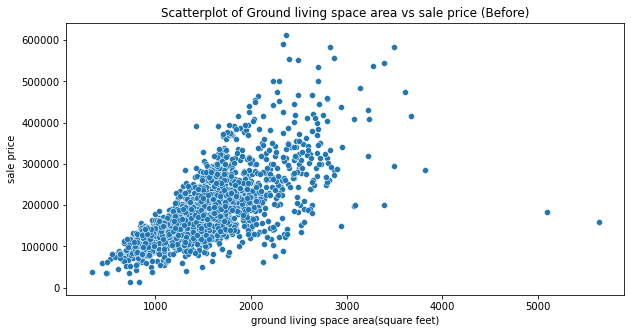

In [29]:
# Observing the outlines in a scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'gr_liv_area', y = 'saleprice', data = training)
plt.title('Scatterplot of Ground living space area vs sale price (Before)')
plt.xlabel('ground living space area(square feet)')
plt.ylabel('sale price');
plt.savefig("../images/Outlier_Scatter_before")

In [30]:
training.shape

(2051, 80)

In [31]:
# removing observations with above 4000 ground living space  
training = training[training.gr_liv_area < 4000]

In [32]:
training.shape

(2049, 80)

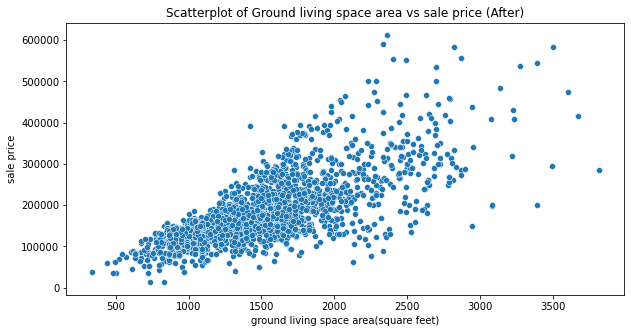

In [33]:
# Observing saleprice against gr_liv_area after the outliers removed
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'gr_liv_area', y = 'saleprice', data = training);
plt.title('Scatterplot of Ground living space area vs sale price (After)')
plt.xlabel('ground living space area(square feet)')
plt.ylabel('sale price');
plt.savefig("../images/Outlier_Scatter_after")

In [34]:
training.gr_liv_area.describe()

count    2049.000000
mean     1495.553441
std       485.783577
min       334.000000
25%      1128.000000
50%      1444.000000
75%      1728.000000
max      3820.000000
Name: gr_liv_area, dtype: float64

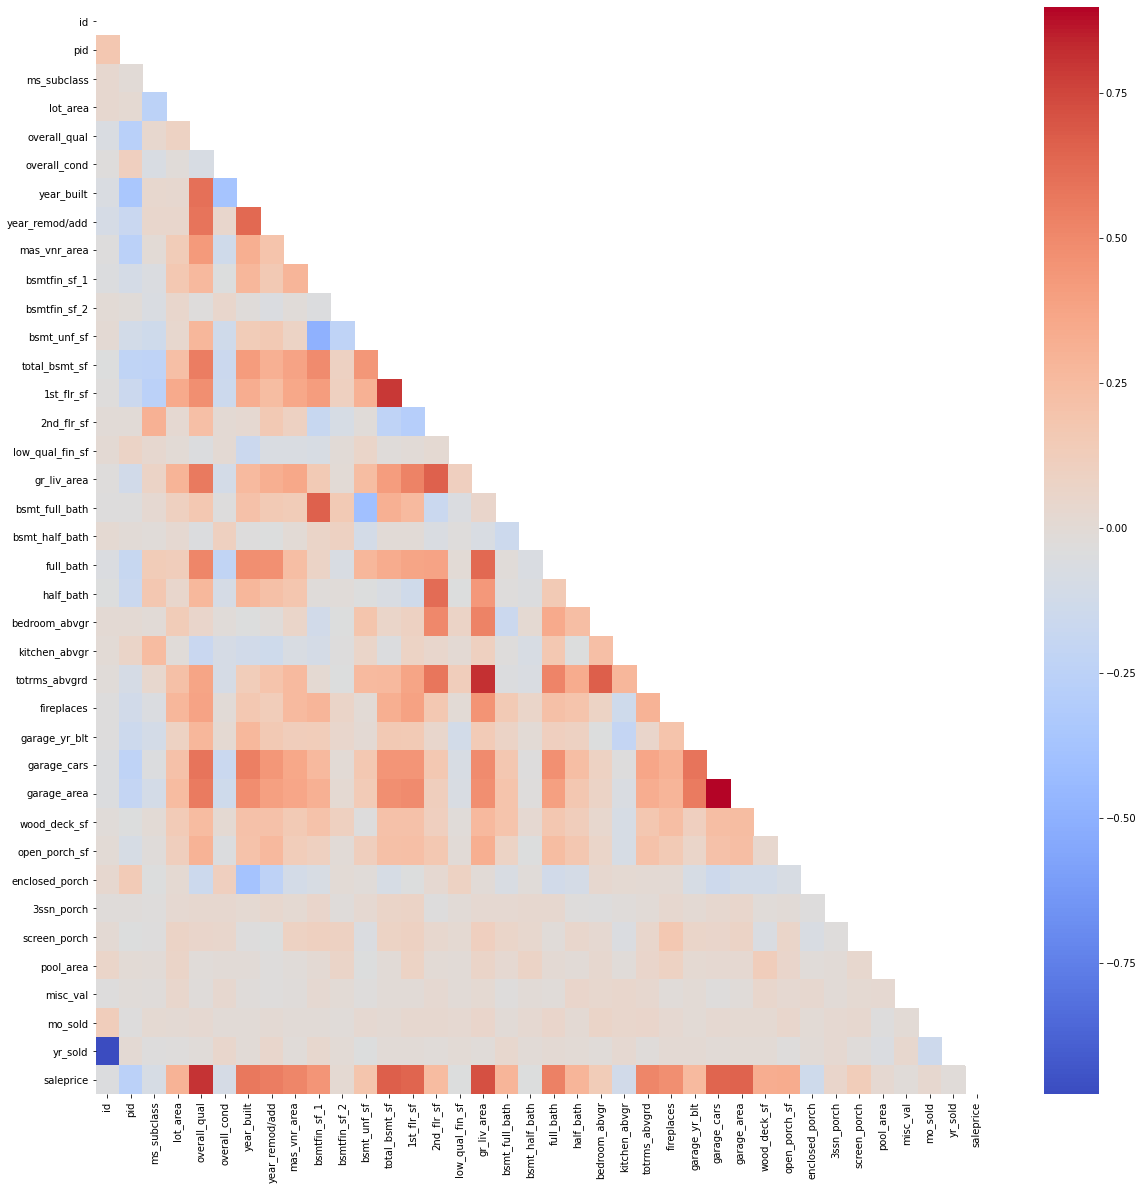

In [35]:
# Correlation of entire training data set.
# However only discrete and continuous variables were taken into account for correlation
plt.figure(figsize=(20,20))
sns.heatmap(training.corr(),mask = np.triu(training.corr()),cmap='coolwarm');

In [36]:
# Checking the target(saleprice) correlation with the other predictors from the training dataset
# https://blog.softhints.com/pandas-display-all-columns-and-show-more-rows/
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
training.corr()['saleprice'].sort_values(ascending = False)

saleprice          1.000000
overall_qual       0.803462
gr_liv_area        0.719463
total_bsmt_sf      0.665116
garage_area        0.655097
1st_flr_sf         0.648252
garage_cars        0.648227
year_built         0.572405
year_remod/add     0.550872
full_bath          0.538225
mas_vnr_area       0.511273
totrms_abvgrd      0.509775
fireplaces         0.473783
bsmtfin_sf_1       0.446103
open_porch_sf      0.338545
wood_deck_sf       0.327629
lot_area           0.303744
bsmt_full_bath     0.284433
half_bath          0.283372
garage_yr_blt      0.258697
2nd_flr_sf         0.248826
bsmt_unf_sf        0.190883
bedroom_abvgr      0.137145
screen_porch       0.134555
3ssn_porch         0.048721
mo_sold            0.032508
pool_area          0.025805
bsmtfin_sf_2       0.016398
misc_val          -0.010323
yr_sold           -0.015174
low_qual_fin_sf   -0.041608
bsmt_half_bath    -0.045534
id                -0.051416
ms_subclass       -0.087331
overall_cond      -0.097093
kitchen_abvgr     -0

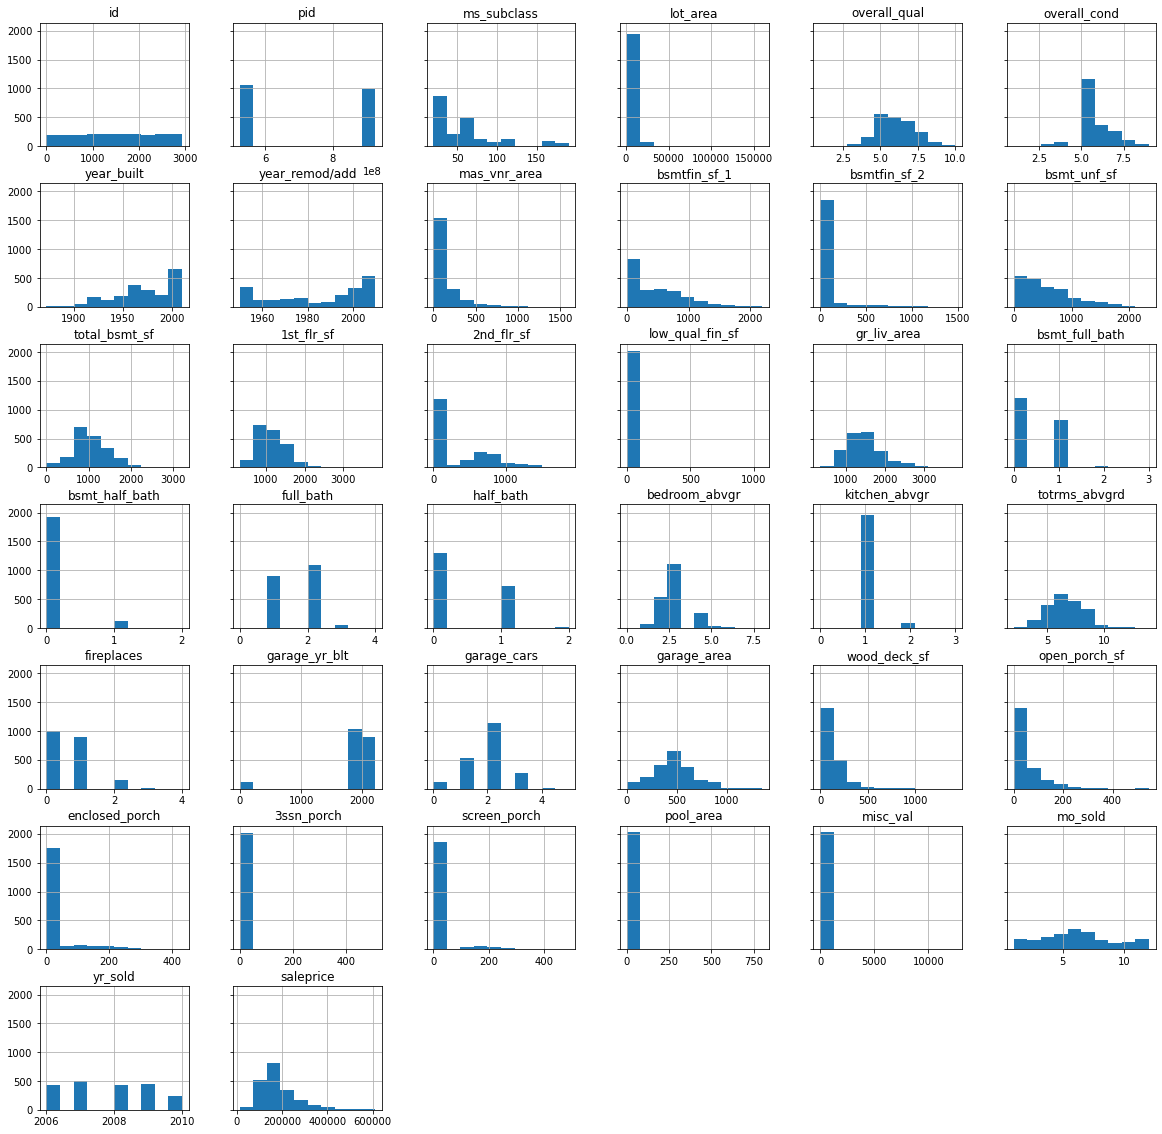

In [37]:
training.hist(figsize=(20,20),sharey=True);

The distributions of the features are majority right skewed. 
Meaning to say most of the observations are on the left side of the distribution.
An example would be the histogram for 'gr_liv_area' which represents living area square feet. From the distribution, most of the house are within 1000-2000 living area square feet. 
Positively skewed histogram also meant that the mean(1495.55) is larger than the median(1444).

### Ranking Training's dataset ordinal features

Ordinal features for the training dataset were ranked with 1 being the lowest, ascending score would mean that it is of a  better tier and 0 would indicate that the feature is 'NA'.

In [38]:
training.lot_shape.unique()
training['lot_shape']=training['lot_shape'].map({'IR3': 1, 'IR2': 2, 'IR1': 3,'Reg': 4})

training.utilities.unique()
training['utilities'] = training['utilities'].map({'ELO':1, 'NoSeWa': 2, 'NoSewr':3, 'AllPub':4})

training.land_slope.unique()
training['land_slope'] = training['land_slope'].map({'Sev': 1,'Mod':2, 'Gtl':3 })

training.overall_qual.unique() # there's already a ranking hence no need to map

training.overall_cond.unique() # there's already a ranking hence no need to map

training.exter_qual.unique()
training['exter_qual'] = training['exter_qual'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

training.exter_cond.unique()
training['exter_cond'] = training['exter_cond'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

training.bsmt_qual.unique()
training['bsmt_qual'] = training['bsmt_qual'].map({'NA': 0 , 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

training.bsmt_cond.unique()
training['bsmt_cond'] = training['bsmt_cond'].map({'NA': 0 , 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

training.bsmt_exposure.unique()
training['bsmt_exposure'] = training['bsmt_exposure'].map({'NA':0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})

training.bsmtfin_type_1.unique()
training['bsmtfin_type_1'] = training['bsmtfin_type_1'].map({'NA': 0 , 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

training.bsmtfin_type_2.unique()
training['bsmtfin_type_2'] = training['bsmtfin_type_2'].map({'NA': 0 , 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

training.heating_qc.unique()
training['heating_qc'] = training['heating_qc'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd' : 4, 'Ex': 5})

training.kitchen_qual.unique()
training['kitchen_qual'] = training['kitchen_qual'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

training.functional.unique()
training['functional'] = training['functional'].map({'Sal': 1, 'Sev': 2, 'Maj2':3 , 'Maj1': 4, 'Mod':5, 'Min2': 6, 'Min1': 7, 'Typ': 8})

training.fireplace_qu.unique()
training['fireplace_qu'] = training['fireplace_qu'].map({'NA': 0 , 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

training.garage_finish.unique()
training['garage_finish'] = training['garage_finish'].map({'NA': 0 , 'Unf': 1, 'RFn': 2, 'Fin': 3})

training.garage_qual.unique()
training['garage_qual'] = training['garage_qual'].map({'NA': 0 , 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

training.garage_cond.unique()
training['garage_cond'] = training['garage_cond'].map({'NA': 0 , 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

training.paved_drive.unique()
training['paved_drive'] = training['paved_drive'].map({'N': 1, 'P': 1, 'Y': 2})

training.pool_qc.unique()
training['pool_qc'] = training['pool_qc'].map({'NA': 0 , 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

training.fence.unique()
training['fence'] = training['fence'].map({'NA': 0 , 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})

In [39]:
training.shape

(2049, 80)

In [40]:
# Checking if the mapping is in place
training.head()

,id,pid,ms_subclass,ms_zoning,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,13517,Pave,NA,3,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,Attchd,1976.0,2,2.0,475.0,3,3,2,0,44,0,0,0,0,0,0,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,NA,3,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3,Attchd,1997.0,2,2.0,559.0,3,3,2,0,74,0,0,0,0,0,0,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,NA,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0,Detchd,1953.0,1,1.0,246.0,3,3,2,0,52,0,0,0,0,0,0,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,NA,4,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,2,100,0,0,0,0,0,0,0,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,NA,3,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0,Detchd,1957.0,1,2.0,484.0,3,3,1,0,59,0,0,0,0,0,0,NA,0,3,2010,WD,138500


In [41]:
# Training dataset's target correlation consist of ordinal features 
# such as exter_qual, kitchen_qual with slightly high corr values(0.715, 0.694) respectively 
training.corr()['saleprice'].sort_values(ascending=False)

saleprice          1.000000
overall_qual       0.803462
gr_liv_area        0.719463
exter_qual         0.715048
kitchen_qual       0.694295
total_bsmt_sf      0.665116
garage_area        0.655097
1st_flr_sf         0.648252
garage_cars        0.648227
bsmt_qual          0.613236
year_built         0.572405
garage_finish      0.558566
year_remod/add     0.550872
fireplace_qu       0.539484
full_bath          0.538225
mas_vnr_area       0.511273
totrms_abvgrd      0.509775
fireplaces         0.473783
heating_qc         0.458636
bsmtfin_sf_1       0.446103
bsmt_exposure      0.426134
bsmtfin_type_1     0.350728
open_porch_sf      0.338545
wood_deck_sf       0.327629
lot_area           0.303744
paved_drive        0.289267
garage_qual        0.285328
bsmt_full_bath     0.284433
half_bath          0.283372
garage_cond        0.265066
garage_yr_blt      0.258697
2nd_flr_sf         0.248826
bsmt_cond          0.225096
bsmt_unf_sf        0.190883
bedroom_abvgr      0.137145
screen_porch       0

### Dummify nominal variables in the training dataset

In [42]:
#defining nominal columns in a list
train_nominal = [
    "ms_subclass",
"ms_zoning",
"street",
"land_contour",
"lot_config",
"neighborhood",
"condition_1",
"condition_2",
"bldg_type",
"house_style",
"roof_style",
"roof_matl",
"exterior_1st",
"exterior_2nd",
"mas_vnr_type",
"foundation",
"heating",
"central_air",
"electrical",
"garage_type",
"misc_feature",
"sale_type",
"alley"

]

In [43]:
training_dummies = pd.get_dummies(columns = train_nominal,data = training, drop_first=True)

In [44]:
training.shape

(2049, 80)

In [45]:
training_dummies.shape

(2049, 213)

In [46]:
# Checking training data target(saleprice) corr with dummfied variables implemented
# Notable features are foundation_PConc & neighborhood_NridgHt with corr(0.529, 0.448) respectively

training_dummies.corr().saleprice.sort_values(ascending=False)

saleprice               1.000000
overall_qual            0.803462
gr_liv_area             0.719463
exter_qual              0.715048
kitchen_qual            0.694295
total_bsmt_sf           0.665116
garage_area             0.655097
1st_flr_sf              0.648252
garage_cars             0.648227
bsmt_qual               0.613236
year_built              0.572405
garage_finish           0.558566
year_remod/add          0.550872
fireplace_qu            0.539484
full_bath               0.538225
foundation_PConc        0.529500
mas_vnr_area            0.511273
totrms_abvgrd           0.509775
fireplaces              0.473783
heating_qc              0.458636
neighborhood_NridgHt    0.448639
bsmtfin_sf_1            0.446103
bsmt_exposure           0.426134
sale_type_New           0.360599
garage_type_Attchd      0.358104
ms_subclass_60          0.356092
bsmtfin_type_1          0.350728
exterior_1st_VinylSd    0.342156
open_porch_sf           0.338545
exterior_2nd_VinylSd    0.337571
wood_deck_

In [47]:
# the variable 'gr_liv_area' seems to be a sum of 1st_flr_sf + 2nd_flr_sf + low_qual_fin_sf
# Therefore I did a test to see how many observations return True from the above

(training_dummies['gr_liv_area'] == training_dummies['1st_flr_sf']+training_dummies['2nd_flr_sf']+training_dummies['low_qual_fin_sf']).sum()

2049

In [48]:
training_dummies.shape

(2049, 213)

In [49]:
# The total count is 2049 which tallies with the training_dummies shape, hence we can retain gr_liv_area 
# and remove '1st_flr_sf', '2nd_flr_sf' and 'low_qual_fin_sf'
# also dropping as they do not contribute to the salevalue.
final_train = training_dummies.drop(columns=['1st_flr_sf', '2nd_flr_sf','low_qual_fin_sf','pid'])


In [50]:
# Checking for the highest correlation variables,
final_train.corr().saleprice.sort_values(ascending=False)

saleprice               1.000000
overall_qual            0.803462
gr_liv_area             0.719463
exter_qual              0.715048
kitchen_qual            0.694295
total_bsmt_sf           0.665116
garage_area             0.655097
garage_cars             0.648227
bsmt_qual               0.613236
year_built              0.572405
garage_finish           0.558566
year_remod/add          0.550872
fireplace_qu            0.539484
full_bath               0.538225
foundation_PConc        0.529500
mas_vnr_area            0.511273
totrms_abvgrd           0.509775
fireplaces              0.473783
heating_qc              0.458636
neighborhood_NridgHt    0.448639
bsmtfin_sf_1            0.446103
bsmt_exposure           0.426134
sale_type_New           0.360599
garage_type_Attchd      0.358104
ms_subclass_60          0.356092
bsmtfin_type_1          0.350728
exterior_1st_VinylSd    0.342156
open_porch_sf           0.338545
exterior_2nd_VinylSd    0.337571
wood_deck_sf            0.327629
mas_vnr_ty

<Figure size 1440x1440 with 0 Axes>

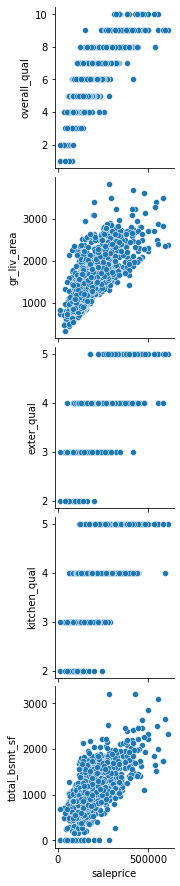

In [51]:
plt.figure(figsize=(20,20))
sns.pairplot(final_train, y_vars=['overall_qual', 'gr_liv_area', 'exter_qual', 'kitchen_qual', 'total_bsmt_sf'], x_vars=['saleprice'],diag_kind=None);
plt.style.use('fivethirtyeight')

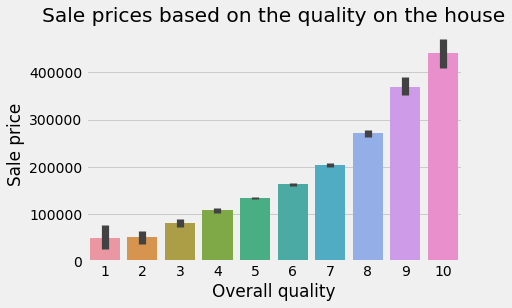

In [52]:
plt.title('Sale prices based on the quality on the house')
ax = sns.barplot(data = final_train, y='saleprice', x = 'overall_qual')
ax.set(xlabel='Overall quality',ylabel = 'Sale price')
plt.savefig("../images/Bar_overall_qual",bbox_inches='tight')


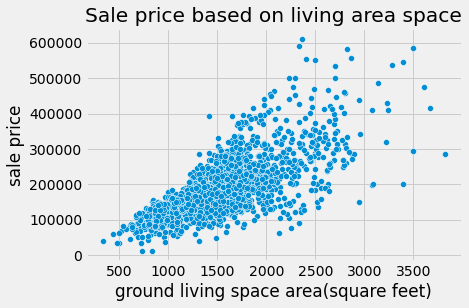

In [53]:
plt.title('Sale price based on living area space')
plt.xlabel('ground living space area(square feet)')
plt.ylabel('sale price')
sns.scatterplot(data = final_train, x = 'gr_liv_area',y = 'saleprice');
plt.savefig("../images/Scatter_gr_liv_area",bbox_inches='tight')

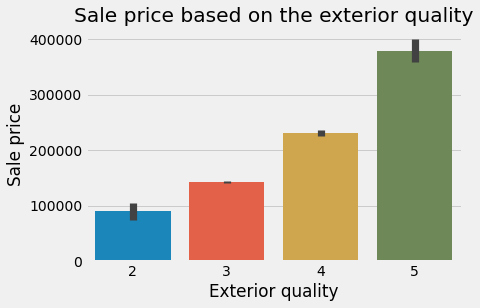

In [54]:
plt.title('Sale price based on the exterior quality')
ax = sns.barplot(x = 'exter_qual', y = 'saleprice', data = final_train)
ax.set(xlabel=('Exterior quality'),ylabel=('Sale price'));
plt.savefig("../images/Bar_Exter_qual",bbox_inches='tight')

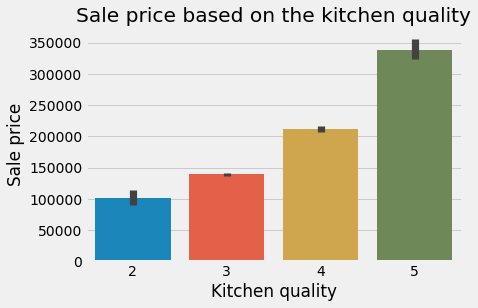

In [55]:
plt.title('Sale price based on the kitchen quality')
ax = sns.barplot(x = 'kitchen_qual', y = 'saleprice', data = final_train)
ax.set(xlabel=('Kitchen quality'),ylabel=('Sale price'));
plt.savefig("../images/Bar_Kitchen_qual",bbox_inches='tight')

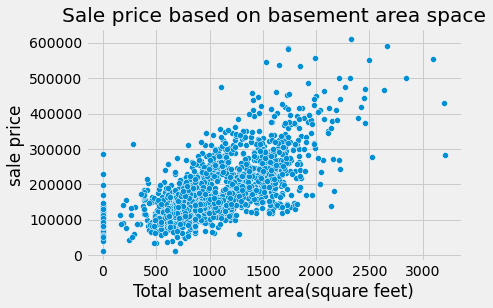

In [56]:
plt.title('Sale price based on basement area space')
plt.xlabel('Total basement area(square feet)')
plt.ylabel('sale price')
sns.scatterplot(data = final_train, x = 'total_bsmt_sf',y = 'saleprice');
plt.savefig("../images/Scatter_bsmt_sf",bbox_inches='tight')

From the top 5 correlated features, we can see both area space and quality are dominating the ranks. 

Quality of house definitely plays a huge role in the sale price as we can see from the charts above, there is a huge jump of sale price on overall quality(first chart)from a score of 7 onwards, which could be almost a spike of approximately 100,000.

For the area space, you can see that there is an upward trend. With larger space, prices are more expensive.
However, if we look at the basement graph, it is also possible to have houses priced at 200,000 to 300,000 with no basement.
This could be due to other variables such as the age of the house and quality.

With the current inference, it would be insufficient to determine the sale price as they are all under the same category. It would be better to add in more independent correlated features as predictors.  

### Ranking Test's dataset ordinal features

Similarly to training dataset, ordinal features for the test dataset were ranked with 1 being the lowest, ascending score would mean that it is of a better tier and 0 would indicate that the feature is 'NA'.

In [57]:
test.lot_shape.unique()
test['lot_shape']=test['lot_shape'].map({'IR3': 1, 'IR2': 2, 'IR1': 3,'Reg': 4})

test.utilities.unique()
test['utilities'] = test['utilities'].map({'ELO':1, 'NoSeWa': 2, 'NoSewr':3, 'AllPub':4})

test.land_slope.unique()
test['land_slope'] = test['land_slope'].map({'Sev': 1,'Mod':2, 'Gtl':3 })

test.overall_qual.unique() # there's already a ranking hence no need to map

test.overall_cond.unique() # there's already a ranking hence no need to map

test.exter_qual.unique()
test['exter_qual'] = test['exter_qual'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

test.exter_cond.unique()
test['exter_cond'] = test['exter_cond'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

test.bsmt_qual.unique()
test['bsmt_qual'] = test['bsmt_qual'].map({'NA': 0 , 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

test.bsmt_cond.unique()
test['bsmt_cond'] = test['bsmt_cond'].map({'NA': 0 , 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

test.bsmt_exposure.unique()
test['bsmt_exposure'] = test['bsmt_exposure'].map({'NA':0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})

test.bsmtfin_type_1.unique()
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].map({'NA': 0 , 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

test.bsmtfin_type_2.unique()
test['bsmtfin_type_2'] = test['bsmtfin_type_2'].map({'NA': 0 , 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

test.heating_qc.unique()
test['heating_qc'] = test['heating_qc'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd' : 4, 'Ex': 5})

test.kitchen_qual.unique()
test['kitchen_qual'] = test['kitchen_qual'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

test.functional.unique()
test['functional'] = test['functional'].map({'Sal': 1, 'Sev': 2, 'Maj2':3 , 'Maj1': 4, 'Mod':5, 'Min2': 6, 'Min1': 7, 'Typ': 8})

test.fireplace_qu.unique()
test['fireplace_qu'] = test['fireplace_qu'].map({'NA': 0 , 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

test.garage_finish.unique()
test['garage_finish'] = test['garage_finish'].map({'NA': 0 , 'Unf': 1, 'RFn': 2, 'Fin': 3})

test.garage_qual.unique()
test['garage_qual'] = test['garage_qual'].map({'NA': 0 , 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

test.garage_cond.unique()
test['garage_cond'] = test['garage_cond'].map({'NA': 0 , 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

test.paved_drive.unique()
test['paved_drive'] = test['paved_drive'].map({'N': 1, 'P': 1, 'Y': 2})

test.pool_qc.unique()
test['pool_qc'] = test['pool_qc'].map({'NA': 0 , 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

test.fence.unique()
test['fence'] = test['fence'].map({'NA': 0 , 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})


In [58]:
test.shape

(878, 79)

### Dummify nominal variables in the test dataset

In [59]:
#defining nominal columns in a list
test_nominal = [
    "ms_subclass",
"ms_zoning",
"street",
"land_contour",
"lot_config",
"neighborhood",
"condition_1",
"condition_2",
"bldg_type",
"house_style",
"roof_style",
"roof_matl",
"exterior_1st",
"exterior_2nd",
"mas_vnr_type",
"foundation",
"heating",
"central_air",
"electrical",
"garage_type",
"misc_feature",
"sale_type",
"alley"

]

In [60]:
test_dummies = pd.get_dummies(columns = test_nominal,data = test, drop_first=True)

In [61]:
test.shape

(878, 79)

In [62]:
test_dummies.shape

(878, 203)

In [63]:
# Dropping the same columns as training set
final_test = test_dummies.drop(columns=['1st_flr_sf', '2nd_flr_sf','low_qual_fin_sf','pid']) 

### Exporting both final set to csv

In [64]:
final_train.to_csv('../datasets/final_train.csv',index=False)
final_test.to_csv('../datasets/final_test.csv',index=False)